In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 38% survived the Titanic!

In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


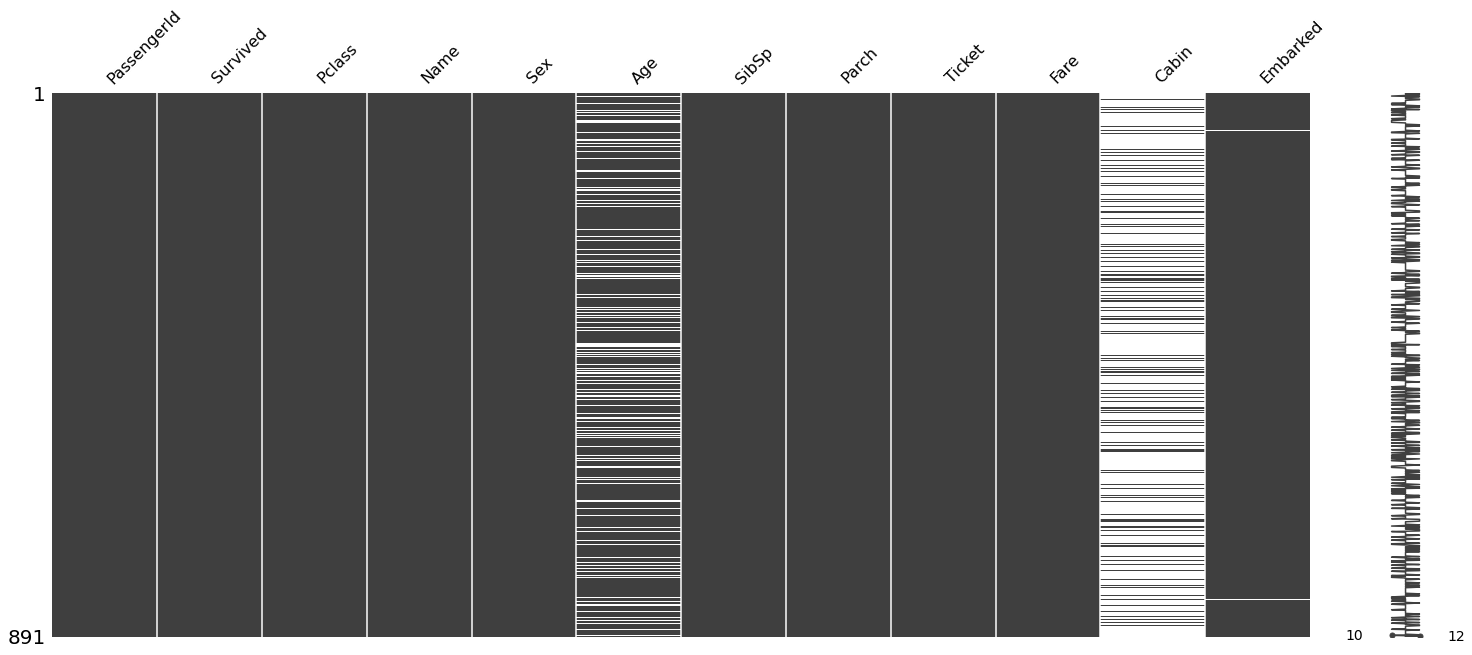

In [6]:
import missingno as msno
msno.matrix(train)
plt.show()

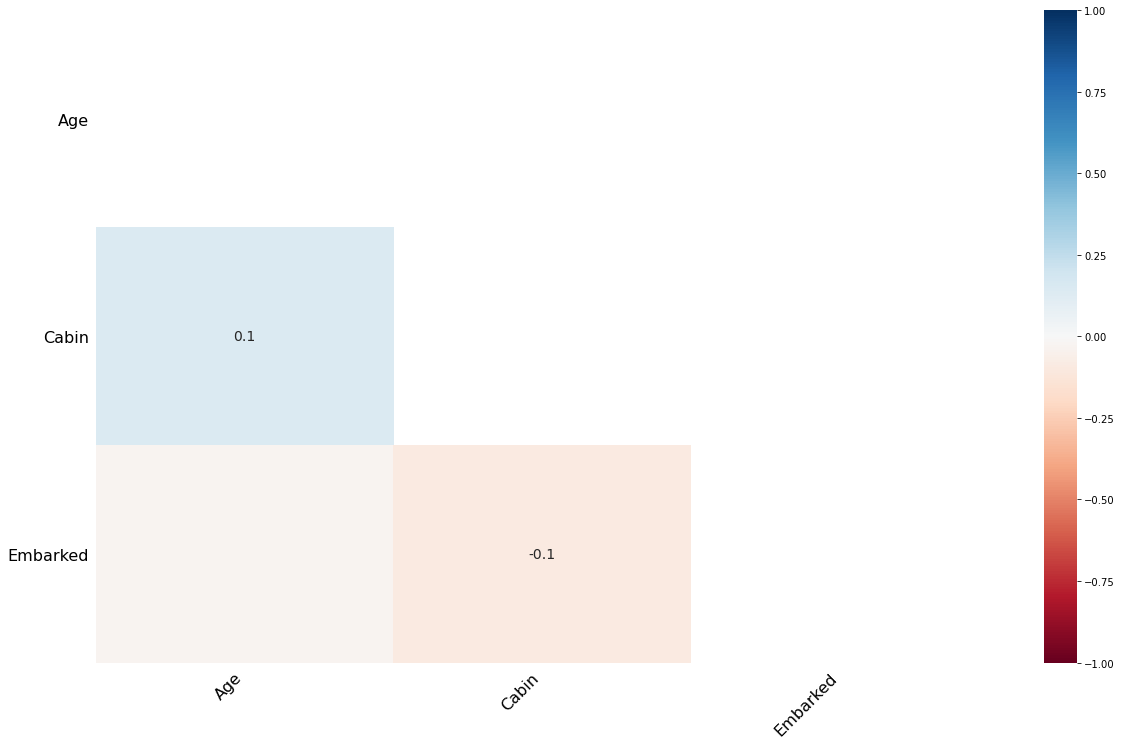

In [7]:
msno.heatmap(train)
plt.show()

In [8]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
total = train.isnull().sum().sort_values(ascending=False)
percent = train.isnull().sum()/train.isnull().count() * 100
missing_data = pd.concat([total, percent], axis=1)
missing_data

,0,1
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [10]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

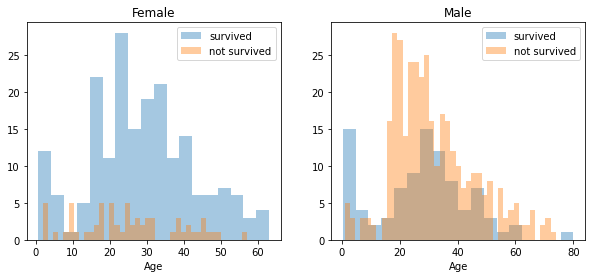

In [11]:
# age and sex
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label='survived', ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label='not survived', ax=axes[0], kde=False)
ax.legend(loc='best')
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label='survived', ax=axes[1], kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label='not survived', ax=axes[1], kde=False)
ax.legend(loc='best')
ax.set_title('Male')
plt.show()

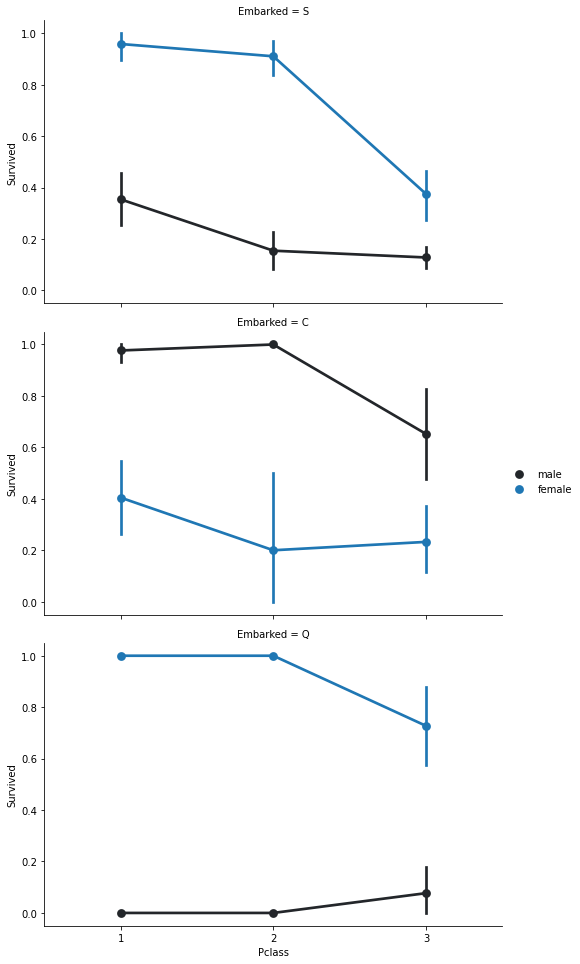

In [12]:
fg = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
fg.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
fg.add_legend()
plt.show()

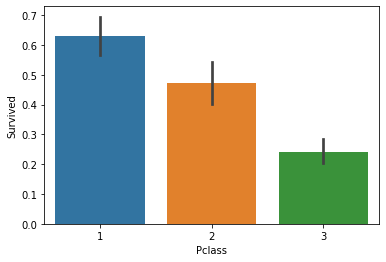

In [13]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.show()

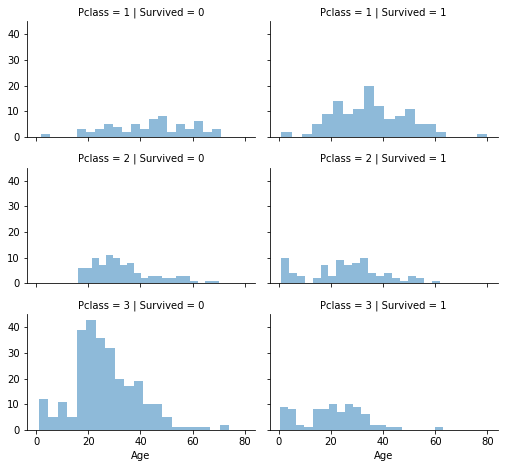

In [14]:
fg2 = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
fg2.map(plt.hist, 'Age', alpha=0.5, bins=20)
fg2.add_legend()
plt.show()

In [15]:
data = [train, test]
for df in data:
    df['relatives'] = df['SibSp'] + df['Parch']
    df.loc[df['relatives']>0, 'not_alone'] = 0
    df.loc[df['relatives']==0, 'not_alone'] = 1
    df['not_alone'] = df['not_alone'].astype(int)

In [16]:
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

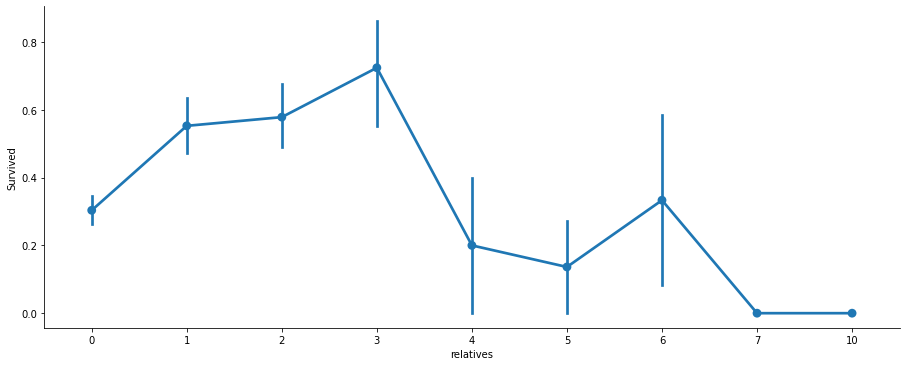

In [17]:
axes = sns.factorplot('relatives', 'Survived', data=train, aspect=2.5)

In [18]:
train = train.drop(['PassengerId'], axis=1)

In [19]:
train['Cabin'].head(5)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [20]:
# filling Cabin missing values
import re
deck = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'U':8}
data = [train, test]

for df in data:
    df['Cabin'] = df['Cabin'].fillna("U0")
    df['Deck'] = df['Cabin'].map(lambda x: re.compile('([a-zA-Z]+)').search(x).group())
    df['Deck'] = df['Deck'].map(deck)
    df['Deck'] = df['Deck'].fillna(0)
    df['Deck'] = df['Deck'].astype(int)


train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [21]:
# filling Age missing values
data = [train, test]

for df in data:
    mean = train['Age'].mean()
    std = test['Age'].std()
    is_null = df['Age'].isnull().sum()
    rand_age = np.random.randint(mean-std, mean+std, size=is_null)
    age_copy = df['Age'].copy()
    age_copy[np.isnan(age_copy)] = rand_age
    df['Age'] = age_copy
    df['Age'] = train['Age'].astype(int)

In [22]:
train['Age'].isnull().sum()

0

In [23]:
# fill embarked missing values
train['Embarked'].head(5)

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [24]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [25]:
top_value = 'S'
data = [train, test]

for df in data:
    df['Embarked'] = df['Embarked'].fillna(top_value)

train['Embarked'].isnull().sum()

0

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


- 1 float -> Fare
- 4 categorical -> Name, Sex, Ticket, Embarked

In [27]:
# Fare
data = [train, test]
for df in data:
    df['Fare'] = df['Fare'].fillna(0)
    df['Fare'] = df['Fare'].astype(int)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   891 non-null    int64 
 1   Pclass     891 non-null    int64 
 2   Name       891 non-null    object
 3   Sex        891 non-null    object
 4   Age        891 non-null    int64 
 5   SibSp      891 non-null    int64 
 6   Parch      891 non-null    int64 
 7   Ticket     891 non-null    object
 8   Fare       891 non-null    int64 
 9   Embarked   891 non-null    object
 10  relatives  891 non-null    int64 
 11  not_alone  891 non-null    int64 
 12  Deck       891 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 90.6+ KB


In [28]:
data = [train, test]
titles = {'Mr': 1, 'Miss': 2, '<rd': 3, 'Master': 4, 'Rare': 5}

for df in data:
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Dr', 'Sir','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    df['Title'] = df['Title'].map(titles)
    df['Title'] = df['Title'].fillna(0)

train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [29]:
# sex
genders = {'male':0, 'female':1}
data = [train, test]

for df in data:
    df['Sex'] = df['Sex'].map(genders)

In [30]:
# dropping ticket
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [31]:
# Embarked
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [32]:
maps = {'Q':0, 'S':1, 'C':2}
data = [train, test]

for df in data:
    df['Embarked'] = df['Embarked'].map(maps)

In [33]:
# age categories
data = [train, test]
for df in data:
    df['Age'] = df['Age'].astype(int)
    
    df.loc[df['Age']<=11, 'Age'] = 0
    df.loc[(df['Age']>11)&(df['Age']<=18), 'Age'] = 1
    df.loc[(df['Age']>18)&(df['Age']<=24), 'Age'] = 2
    df.loc[(df['Age']>24)&(df['Age']<=29), 'Age'] = 3
    df.loc[(df['Age']>29)&(df['Age']<=35), 'Age'] = 4
    df.loc[(df['Age']>35)&(df['Age']<=42), 'Age'] = 5
    df.loc[(df['Age']>42)&(df['Age']<=66), 'Age'] = 6
    df.loc[df['Age']>66, 'Age'] = 6

In [34]:
train['Age'].value_counts()

2    185
4    145
3    134
5    134
6    129
1     96
0     68
Name: Age, dtype: int64

In [35]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,1,1,0,8,1.0
1,1,1,1,5,1,0,71,2,1,0,3,0.0
2,1,3,1,3,0,0,7,1,0,1,8,2.0
3,1,1,1,4,1,0,53,1,1,0,3,0.0
4,0,3,0,4,0,0,8,1,0,1,8,1.0


In [36]:
data = [train, test]

for df in data:
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[(df['Fare'] > 31) & (df['Fare'] <= 99), 'Fare']   = 3
    df.loc[(df['Fare'] > 99) & (df['Fare'] <= 250), 'Fare']   = 4
    df.loc[ df['Fare'] > 250, 'Fare'] = 5
    df['Fare'] = df['Fare'].astype(int)

In [37]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,1,1,0,8,1.0
1,1,1,1,5,1,0,3,2,1,0,3,0.0
2,1,3,1,3,0,0,0,1,0,1,8,2.0
3,1,1,1,4,1,0,3,1,1,0,3,0.0
4,0,3,0,4,0,0,1,1,0,1,8,1.0


In [38]:
# new-feature --- Fare per person
data = [train, test]
for df in data:
    df['Fare_per_person'] = df['Fare']/(df['relatives']+1)
    df['Fare_per_person'] = df['Fare_per_person'].astype(int)

In [39]:
# new-feature --- class*fare
data = [train, test]
for df in data:
    df['class_fare'] = df['Pclass'] * df['Fare']

In [40]:
# pre-processed data
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Fare_per_person,class_fare
0,0,3,0,2,1,0,0,1,1,0,8,1.0,0,0
1,1,1,1,5,1,0,3,2,1,0,3,0.0,1,3
2,1,3,1,3,0,0,0,1,0,1,8,2.0,0,0
3,1,1,1,4,1,0,3,1,1,0,3,0.0,1,3
4,0,3,0,4,0,0,1,1,0,1,8,1.0,1,3


In [41]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Fare_per_person,class_fare
0,892,3,0,2,0,0,0,0,0,1,8,1.0,0,0
1,893,3,1,5,1,0,0,1,1,0,8,0.0,0,0
2,894,2,0,3,0,0,1,0,0,1,8,1.0,1,2
3,895,3,0,4,0,0,1,1,0,1,8,1.0,1,3
4,896,3,1,4,1,1,1,1,2,0,8,0.0,0,3


In [42]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop('PassengerId', axis=1).copy()

In [43]:
# logistic regression
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

lgr_acc = lgr.score(X_train, y_train)*100
print(round(lgr_acc, 2), '%')

80.47 %


In [44]:
# knn
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn_acc = knn.score(X_train, y_train)*100
print(round(knn_acc, 2), '%')

86.08 %


In [45]:
# SVC
svc = SVC()
svc.fit(X_train, y_train)

svc_acc = svc.score(X_train, y_train)*100
print(round(svc_acc, 2), '%')

83.28 %


In [46]:
# LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

linearSVC_acc = linear_svc.score(X_train, y_train)*100
print(round(linearSVC_acc, 2), '%')

80.81 %


In [47]:
# random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_acc = rf.score(X_train, y_train)*100
print(round(rf_acc, 2), '%')

92.93 %


In [48]:
# decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

dtree_acc = dtree.score(X_train, y_train)*100
print(round(dtree_acc, 2), '%')

92.93 %


In [49]:
# Gaussian Naive Bayes
gaussianNB = GaussianNB()
gaussianNB.fit(X_train, y_train)

gNB_acc = gaussianNB.score(X_train, y_train)*100
print(round(gNB_acc, 2), '%')

76.54 %


In [50]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

perceptron_acc = perceptron.score(X_train, y_train)*100
print(round(perceptron_acc, 2), '%')

78.79 %


In [51]:
# SGD classifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

sgd_acc = sgd.score(X_train, y_train)*100
print(round(sgd_acc, 2), '%')

77.89 %


In [52]:
accuracies = pd.DataFrame({
    'Model': ['LogisticRegression', 'KNN', 'SVC', 'Linear SVC', 'RandomForest',
             'DecisionTree', 'GaussianNaiveBayes', 'Perceptron', 'SGD'],
    'TrainingAccuracy': [lgr_acc, knn_acc, svc_acc, linearSVC_acc, rf_acc,
                        dtree_acc, gNB_acc, perceptron_acc, sgd_acc]
})
accuracies = accuracies.sort_values(by='TrainingAccuracy', ascending=False)
accuracies = accuracies.reset_index()
accuracies = accuracies.drop('index', axis=1)
accuracies

,Model,TrainingAccuracy
0,RandomForest,92.929293
1,DecisionTree,92.929293
2,KNN,86.083053
3,SVC,83.277217
4,Linear SVC,80.808081
5,LogisticRegression,80.471380
6,Perceptron,78.787879
7,SGD,77.890011
8,GaussianNaiveBayes,76.543210


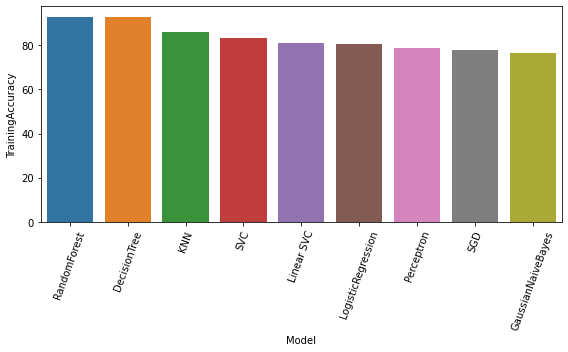

In [53]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='TrainingAccuracy', data=accuracies)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [54]:
y_predictions = rf.predict(X_test)

In [57]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_predictions
})

In [58]:
submission.tail()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
